 <h1><center><strong> NLP - UCI ML Drug Review</strong></center></h1>
 <hr style="color:#E1CF01">

## : Importing Libraries & Reading Data


In [ ]:
 pip install wordcloud 

In [ ]:
# import library, pandas to read the dataset, matplotlib to visualize data, and re to clean the text import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# read data stored in file name Car-details.csv using pd.read_csv, then store the data in df dataframe
dru = pd.read_csv('drugsComTrain_raw.csv')

In [ ]:
df = dru.sample(n = 11000)


In [ ]:
#show first ten dataframe content
df.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
62574,224664,Bupropion,Depression,"""This drug has saved my life! I have struggle...",9,1-Jul-17,60
152958,224663,Bupropion,Depression,"""Been on it for one week. 150XL dry mouth. Los...",4,2-Jul-17,12
38770,173428,Phenylephrine,mulation) (phenylephrine),"""Ever since I was young I have used this nasal...",9,10-Sep-12,8
8864,178810,Victoza,Obesity,"""I&#039;ve been on Victoza for just over a wee...",8,17-Jun-14,90
22157,123564,Skyla,Birth Control,"""I have mixed feelings about Skyla. The people...",5,11-May-17,1
92623,127072,Metoclopramide,Nausea/Vomiting,"""I was given Reglan in the E.R. via I.V. for n...",1,18-Mar-13,32
80249,217321,Clarithromycin,Tonsillitis/Pharyngitis,"""Been taking this medicine for 3 days, so I ha...",8,26-Mar-17,2
132638,58184,Acetaminophen / hydrocodone,Pain,"""Good for toothaches.""",10,26-May-09,9
100292,179056,Victoza,"Diabetes, Type 2","""Started Victoza 3 weeks ago, have had some mu...",10,3-May-10,94
133705,29669,Topiramate,Migraine Prevention,"""My neurologist added Topamax to my tricyclic ...",1,19-Jun-12,16


In [ ]:
# Show last five rows
df.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
23643,180874,"Influenza virus vaccine, inactivated",Influenza Prophylaxis,"""Barely felt the pinch. Just a little redness,...",9,10-Dec-12,2
159720,58517,Jolivette,Birth Control,"""First this pill kind of freaks me out with th...",5,19-Dec-11,10
123198,24918,Compazine,Nausea/Vomiting,"""I was suffering from unexplained nausea for a...",4,3-Aug-15,13
60116,191798,Drospirenone / ethinyl estradiol,Menstrual Disorders,"""I&#039;ve been taking BC pills for nearly 20 ...",8,2-Jul-17,3
49964,128229,Phentermine,Weight Loss,"""I started taking Phentermine 37.5 mg Jan. 21....",8,3-Mar-16,23


In [ ]:
df.shape

(11000, 7)

In [ ]:
# explore the data type at each series
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 62574 to 49964
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     11000 non-null  int64 
 1   drugName     11000 non-null  object
 2   condition    10939 non-null  object
 3   review       11000 non-null  object
 4   rating       11000 non-null  int64 
 5   date         11000 non-null  object
 6   usefulCount  11000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 687.5+ KB


In [ ]:
df.describe()

,uniqueID,rating,usefulCount
count,11000.000000,11000.000000,11000.000000
mean,116507.813818,6.977909,27.925909
std,67625.913647,3.289632,36.155030
min,2.000000,1.000000,0.000000
25%,58098.250000,4.000000,6.000000
50%,116822.000000,8.000000,16.000000
75%,176035.500000,10.000000,36.000000
max,232229.000000,10.000000,559.000000


## Step2: Data Cleaning
<hr style="color:#E1CF01">

In [ ]:
# check to null values 
df.isna().sum()

uniqueID        0
drugName        0
condition      61
review          0
rating          0
date            0
usefulCount     0
dtype: int64

In [ ]:
df.dropna(subset=['condition'],inplace=True)

In [ ]:
# Assess if there are any duplicates.
sum(df.duplicated())

0

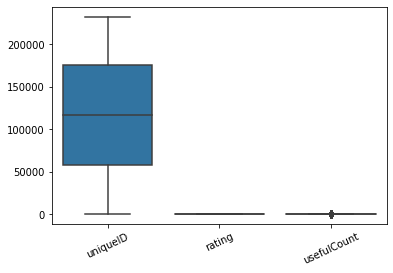

In [ ]:
#Check Outlier
sns.boxplot(data=df)
plt.xticks(rotation=25);

*italicized text*## Step3: Sentiment Analysis

<hr style="color:#E1CF01">

In [ ]:
# feature engineering 
# let's make a new column review sentiment 

df.loc[(df['rating'] >= 7), 'Sentiment'] = ('positive')
df.loc[(df['rating'] < 4), 'Sentiment'] = ('negative')



df['Sentiment'].value_counts()



positive    7236
negative    2398
Name: Sentiment, dtype: int64

In [ ]:
df.head(20)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment
62574,224664,Bupropion,Depression,"""This drug has saved my life! I have struggle...",9,1-Jul-17,60,positive
152958,224663,Bupropion,Depression,"""Been on it for one week. 150XL dry mouth. Los...",4,2-Jul-17,12,NaN
38770,173428,Phenylephrine,mulation) (phenylephrine),"""Ever since I was young I have used this nasal...",9,10-Sep-12,8,positive
8864,178810,Victoza,Obesity,"""I&#039;ve been on Victoza for just over a wee...",8,17-Jun-14,90,positive
22157,123564,Skyla,Birth Control,"""I have mixed feelings about Skyla. The people...",5,11-May-17,1,NaN
92623,127072,Metoclopramide,Nausea/Vomiting,"""I was given Reglan in the E.R. via I.V. for n...",1,18-Mar-13,32,negative
80249,217321,Clarithromycin,Tonsillitis/Pharyngitis,"""Been taking this medicine for 3 days, so I ha...",8,26-Mar-17,2,positive
132638,58184,Acetaminophen / hydrocodone,Pain,"""Good for toothaches.""",10,26-May-09,9,positive
100292,179056,Victoza,"Diabetes, Type 2","""Started Victoza 3 weeks ago, have had some mu...",10,3-May-10,94,positive
133705,29669,Topiramate,Migraine Prevention,"""My neurologist added Topamax to my tricyclic ...",1,19-Jun-12,16,negative


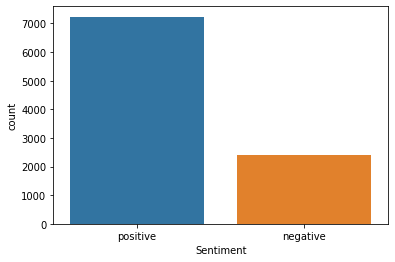

In [ ]:
import seaborn as sns
sns.countplot(df.Sentiment)

## Step4: EDA
<hr style="color:#E1CF01">

In [ ]:
condition_df = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

In [ ]:
condition_df

condition
Birth Control                  111
Pain                            97
Depression                      65
Acne                            62
High Blood Pressure             53
                              ... 
Diarrhea, Chronic                1
Diaper Rash                      1
Diagnosis and Investigation      1
Diabetic Kidney Disease          1
Impetig                          1
Name: drugName, Length: 469, dtype: int64

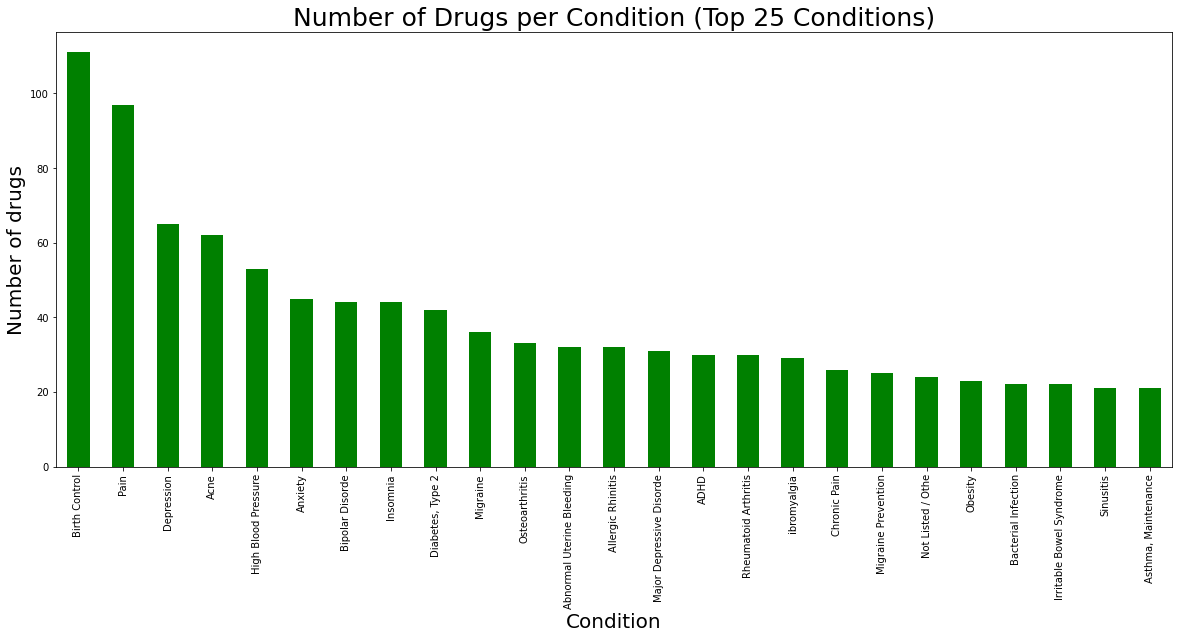

In [ ]:
condition_df[0:25].plot(kind='bar', figsize=(20,8), fontsize=10, color='g')
plt.xlabel("Condition", fontsize=20)
plt.ylabel("Number of drugs", fontsize=20)
plt.title("Number of Drugs per Condition (Top 25 Conditions)", fontsize=25)
plt.show()

In [ ]:
ratings = df['rating'].value_counts().sort_values(ascending=False)

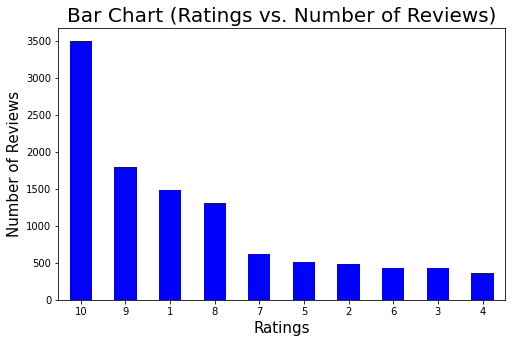

In [ ]:
ratings.plot(kind='bar', figsize=(8,5), fontsize=10, color='b')
plt.xlabel("Ratings", fontsize=15)
plt.xticks(rotation='horizontal')
plt.ylabel("Number of Reviews", fontsize=15)
plt.title("Bar Chart (Ratings vs. Number of Reviews)", fontsize=20)
plt.show()

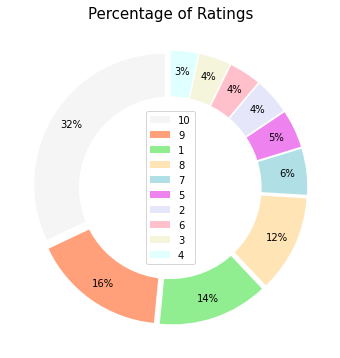

In [ ]:
colors1 = ['whitesmoke','lightsalmon','lightgreen','moccasin','powderblue','violet','lavender','pink','beige','lightcyan']
explode = np.full(shape=10, fill_value=0.05, dtype='float64')
ratings.plot.pie(labels=None, colors=colors1, autopct='%1.0f%%', pctdistance=0.85, explode=explode, startangle=90, figsize=(6,6))
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gcf().gca().add_artist(centre_circle)
plt.legend(ratings.index, loc='center')
plt.xlabel("")
plt.ylabel("")
plt.title("Percentage of Ratings", fontsize=15)
plt.show()

In [ ]:
usefulDrugs = df.groupby(['drugName'])['usefulCount'].nunique().sort_values(ascending=False)

In [ ]:
usefulDrugs

drugName
Sertraline            68
Citalopram            60
Gabapentin            58
Escitalopram          55
Phentermine           53
                      ..
Methylnaltrexone       1
Trihexyphenidyl        1
Trileptal              1
Methyltestosterone     1
Fludrocortisone        1
Name: usefulCount, Length: 1529, dtype: int64

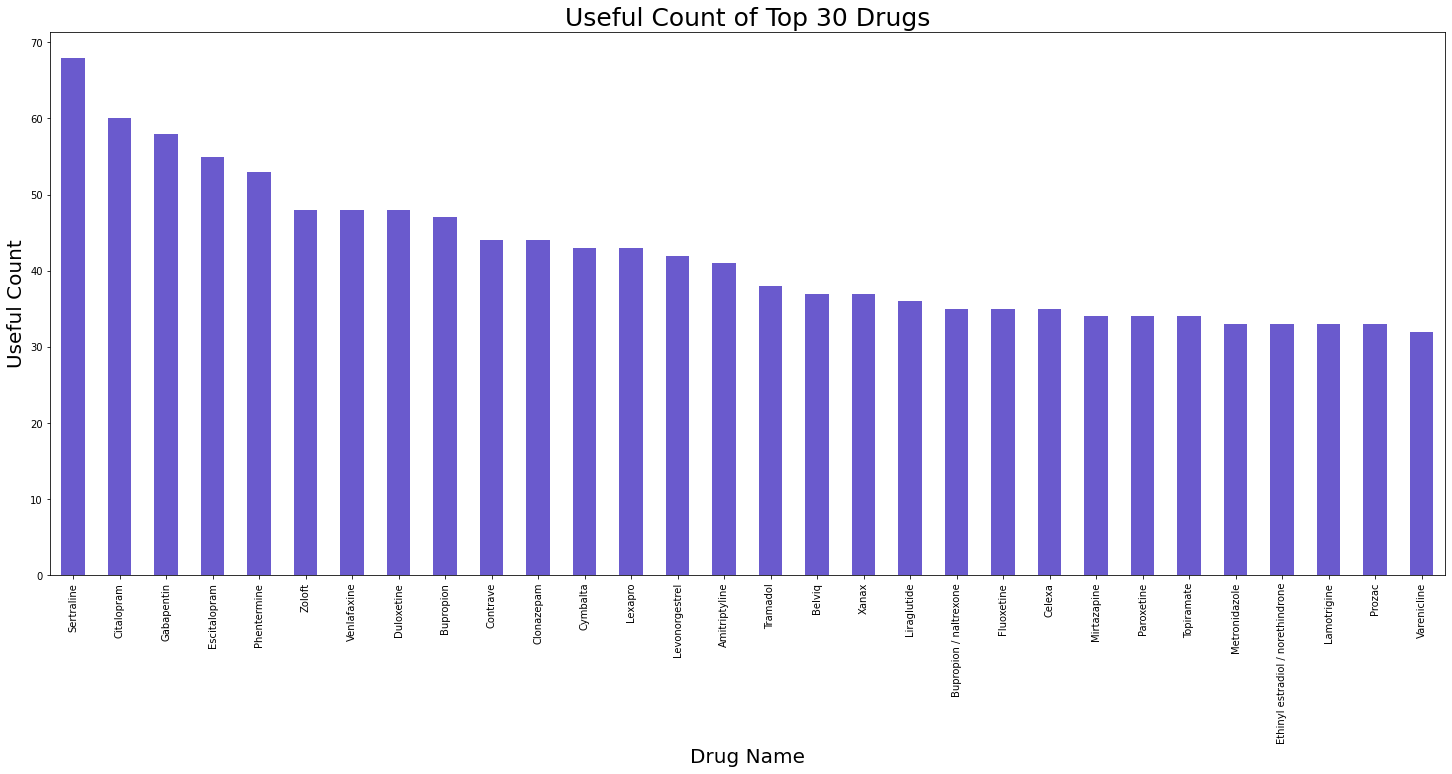

In [ ]:
usefulDrugs[0:30].plot(kind='bar', figsize=(25,10), fontsize=10, color='slateblue')
plt.xlabel("Drug Name", fontsize=20)
plt.ylabel("Useful Count", fontsize=20)
plt.title("Useful Count of Top 30 Drugs", fontsize=25)
plt.show()

In [ ]:
!pip3 install spacy

In [ ]:
#data_sample = df_drop.sample(100000,random_state=2021)
#data_sample['review'] = data_sample['review'].map(lambda x: spell(x))

# Save as csv
#data_sample.to_csv('drugsComTrain_sample.csv')





## Step5: Text Cleaning


In [ ]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [ ]:
data = df[df['review'].map(lambda x: x.isascii())]


In [ ]:
pip install autocorrect


In [ ]:
#from autocorrect import Speller

#spell = Speller(lang='en')
# spell checking
#data['review'] = data['review'].map(lambda x: spell(x))

In [ ]:
#check for alphanumeric , punctuation and repeated characteristics and remove thim
import string

alphanumeric=lambda x: re.sub('\w*\d\w*','',x)
punc_lower=lambda x: re.sub('[%s]'%re.escape(string.punctuation),'',x.lower())

repeated_chars = lambda x: re.sub('(.)\1{2,}', '\1', x)


df['review']=df.review.map(alphanumeric).map(punc_lower).map(repeated_chars)

In [ ]:
# cleaning function
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords 


In [ ]:
# cleaning function

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
from nltk.corpus import stopwords
stopwords.words('english')

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):

    listofwords = sentence.strip().split()          # to remove any space from beginning and the end of text
    listof_words = []    
    for word in listofwords:
        if not word in ENGLISH_STOP_WORDS:
            lemm_word = WordNetLemmatizer().lemmatize(word)
            # remove the stop words
            for punctuation_mark in string.punctuation:
                word = word.replace(punctuation_mark, '')
            if len(word)>0:
                listof_words.append(word)
    return(listof_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
all_list = set(df.index)
span_list = []
for i,j in enumerate(df['condition']):
    if '</span>' in j:
        span_list.append(i)

In [ ]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&$#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [ ]:
df['review_clean'] = df['review']




In [ ]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment,review_clean
62574,224664,Bupropion,Depression,this drug has saved my life i have struggled ...,9,1-Jul-17,60,positive,this drug has saved my life i have struggled ...
152958,224663,Bupropion,Depression,been on it for one week dry mouth lost voice ...,4,2-Jul-17,12,NaN,been on it for one week dry mouth lost voice ...
38770,173428,Phenylephrine,mulation) (phenylephrine),ever since i was young i have used this nasal ...,9,10-Sep-12,8,positive,ever since i was young i have used this nasal ...
8864,178810,Victoza,Obesity,ive been on victoza for just over a week start...,8,17-Jun-14,90,positive,ive been on victoza for just over a week start...
22157,123564,Skyla,Birth Control,i have mixed feelings about skyla the people w...,5,11-May-17,1,NaN,i have mixed feelings about skyla the people w...


In [ ]:
df['review_length'] = df.review.map(len)


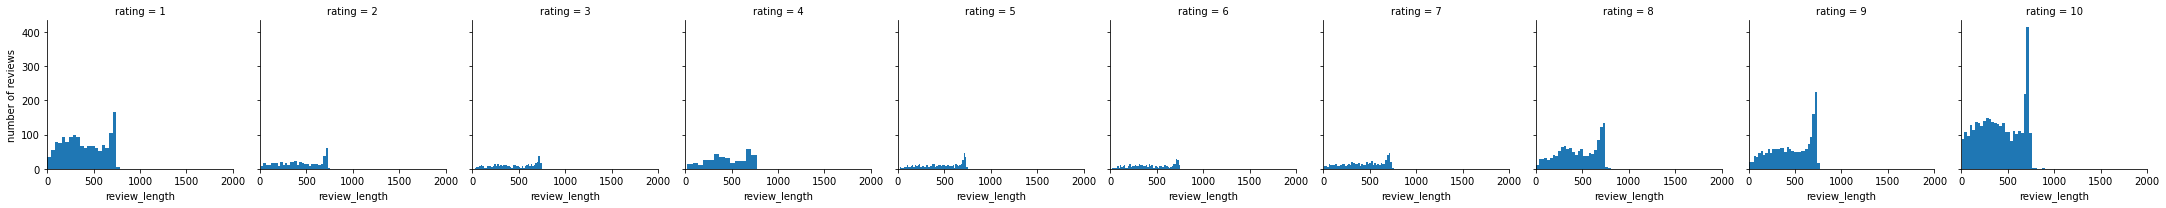

In [ ]:
# check how the review lengths are distributed
ax = sns.FacetGrid(data=df, col='rating', xlim=(0, 2000)).map(plt.hist, 'review_length', bins=50)
ax.axes[0][0].set(ylabel='number of reviews');

In [ ]:

!pip install wordcloud!

ERROR: Invalid requirement: 'wordcloud!'


In [ ]:
from wordcloud import WordCloud

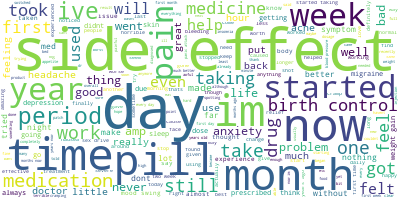

In [ ]:

import string
# Join the different processed reviews together.
long_string = ','.join(list(df['review'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

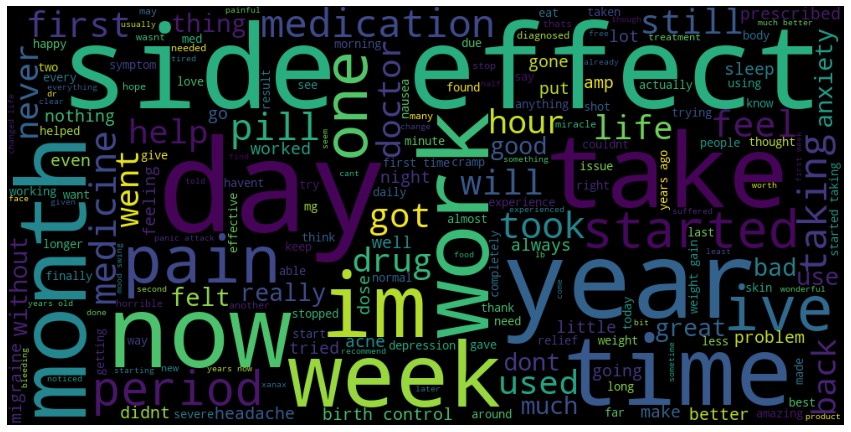

In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud# Word cloud of the reviews with rating equal to 10
df_rate_ten = df.loc[df.rating == 10, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

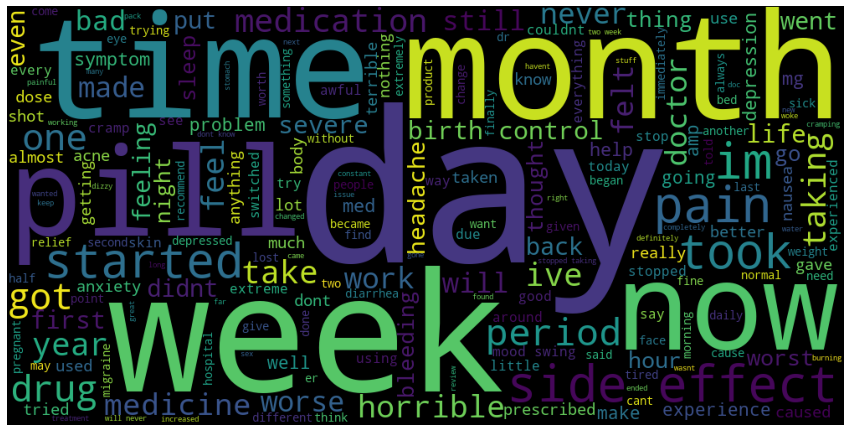

In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud# Word cloud of the reviews with rating equal to 10
df_rate_ten = df.loc[df.rating == 1, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

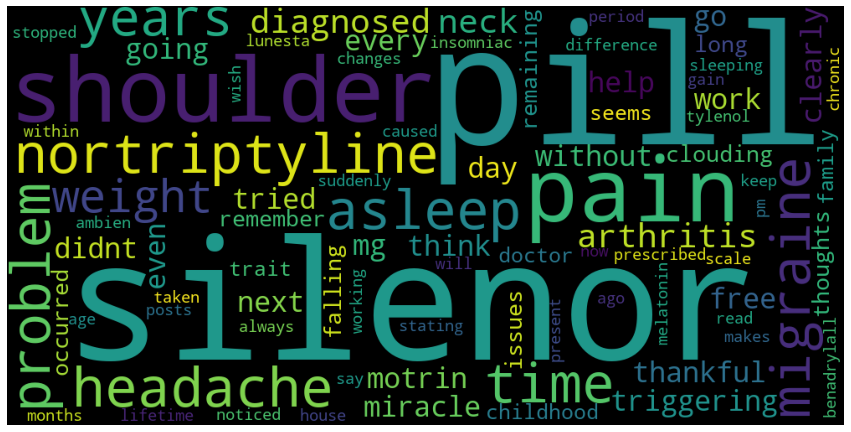

In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud# Word cloud of the reviews with rating equal to 10
df_rate_ten = df.loc[df.usefulCount == 192, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

In [ ]:
df.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment,review_clean,review_length
62574,224664,Bupropion,Depression,this drug has saved my life i have struggled ...,9,1-Jul-17,60,positive,this drug has saved my life i have struggled ...,728
152958,224663,Bupropion,Depression,been on it for one week dry mouth lost voice ...,4,2-Jul-17,12,NaN,been on it for one week dry mouth lost voice ...,397
38770,173428,Phenylephrine,mulation) (phenylephrine),ever since i was young i have used this nasal ...,9,10-Sep-12,8,positive,ever since i was young i have used this nasal ...,361


## Step6:K-Means Clustering
 
<hr style="color:#E1CF01">

In [ ]:
from sklearn.cluster import KMeans

from time import time
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
documents = df['review'].values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)


In [ ]:
k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)


KMeans(max_iter=100, n_clusters=2, n_init=1)

In [ ]:

df['cluster'] = model.labels_

df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment,review_clean,review_length,cluster
62574,224664,Bupropion,Depression,this drug has saved my life i have struggled ...,9,1-Jul-17,60,positive,this drug has saved my life i have struggled ...,728,0
152958,224663,Bupropion,Depression,been on it for one week dry mouth lost voice ...,4,2-Jul-17,12,NaN,been on it for one week dry mouth lost voice ...,397,0
38770,173428,Phenylephrine,mulation) (phenylephrine),ever since i was young i have used this nasal ...,9,10-Sep-12,8,positive,ever since i was young i have used this nasal ...,361,0
8864,178810,Victoza,Obesity,ive been on victoza for just over a week start...,8,17-Jun-14,90,positive,ive been on victoza for just over a week start...,688,0
22157,123564,Skyla,Birth Control,i have mixed feelings about skyla the people w...,5,11-May-17,1,NaN,i have mixed feelings about skyla the people w...,226,1


In [ ]:
df['cluster'].value_counts()

0    8783
1    2156
Name: cluster, dtype: int64

In [ ]:
df['Sentiment'].value_counts()

positive    7236
negative    2398
Name: Sentiment, dtype: int64

In [ ]:
df['Sentiment'].isnull().sum()

1305

In [ ]:
df.dropna(subset=['Sentiment'],inplace=True)

In [ ]:

# output the result to a text file.

clusters = df.groupby('cluster')    
distortions = []


for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['drugName','review']] # get title and overview columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()


In [ ]:

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 pain
 day
 taking
 effects
 years
 im
 medication
 feel
 started
 medicine
------------
Cluster 1:
 period
 pill
 birth
 control
 ive
 months
 im
 periods
 bleeding
 weight
------------


In [ ]:
model.cluster_centers_

array([[1.53602776e-04, 2.51089985e-05, 2.94384189e-05, ...,
        2.24786748e-05, 9.67842047e-05, 2.63315001e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
distortions.append(model.inertia_)


In [ ]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(features)
    distortions.append(kmeanModel.inertia_)

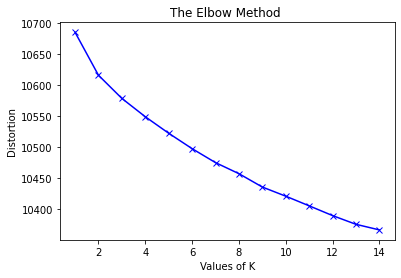

In [ ]:
# Elbow-curve/SSD

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method ')
plt.show() 





```
# This is formatted as code
```

## Hierarchical Clustering


In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity 

In [ ]:
def ward_hierarchical_clustering(feature_matrix):
    
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hierarchical_clusters(linkage_matrix, drug_data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size) 
    drugName_ = drug_data['cluster'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=drugName_,
                    truncate_mode='lastp', 
                    p=p,  
                    no_plot=True)
    temp = {R["leaves"][ii]: drugName_[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,  
            leaf_label_func=llf, 
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('drug_hierachical_clusters.png', dpi=200)

In [ ]:
linkage_matrix = ward_hierarchical_clustering(features)

In [ ]:
np.set_printoptions(suppress=True)
print(linkage_matrix)

[[ 5850.          9825.             0.             2.        ]
 [ 6805.          9069.             0.             2.        ]
 [ 5978.         10330.             0.             2.        ]
 ...
 [21858.         21871.            57.34602175  4155.        ]
 [21873.         21874.            78.56931655  8845.        ]
 [21872.         21875.           121.20428451 10939.        ]]


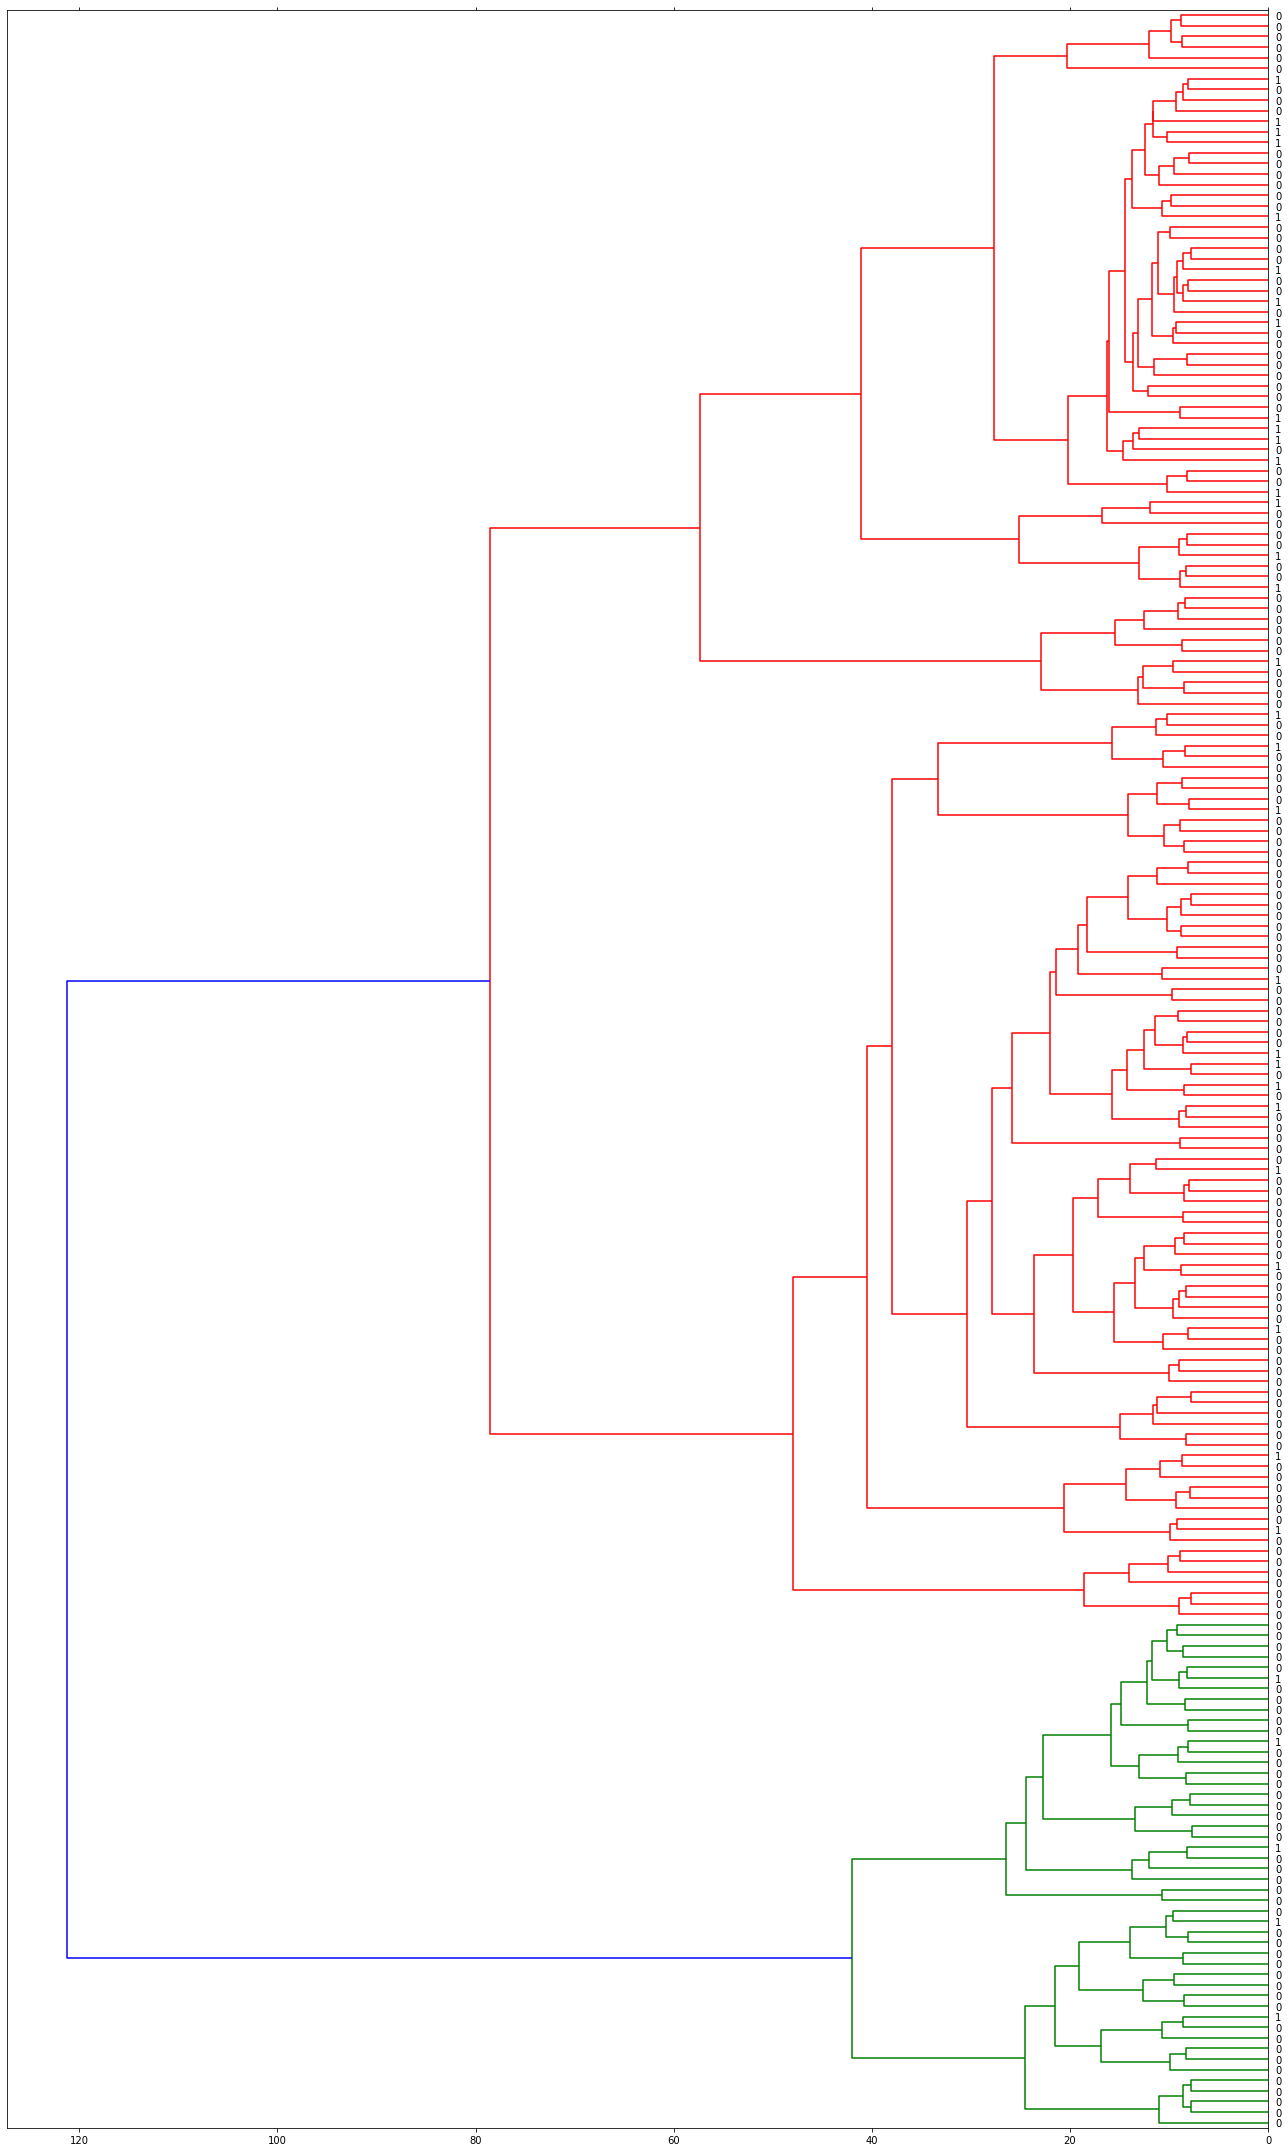

In [ ]:
plot_hierarchical_clusters(linkage_matrix,
                           p=200,
                           drug_data=df,
                           figure_size=(18, 30))


In [ ]:
# read data stored in file name Car-details.csv using pd.read_csv, then store the data in df dataframe
dd = pd.read_csv('cluster0.csv')

In [ ]:
dd.head(4)

,id,drugName,review
0,62574,Bupropion,this drug has saved my life i have struggled ...
1,38770,Phenylephrine,ever since i was young i have used this nasal ...
2,8864,Victoza,ive been on victoza for just over a week start...
3,92623,Metoclopramide,i was given reglan in the er via iv for nausea...


## Step7: recommendation system




